# Using the Faker library to generating a realistic dataset

In [17]:
import random
import pandas as pd
from faker import Faker
from datetime import date

# Initialize Faker
fake = Faker()

# Define categories, payment modes
categories = ["Groceries", "Food", "Transportation", "Entertainment", "Shopping", "Medical Health", "Investment"]
payment_modes = ["Cash", "UPI", "Debit Card", "Credit Card", "Netbanking"]

# Define category specific descriptions
category_descriptions = {
    "Groceries": ["Bought vegetables and fruits", "Grocery shopping at the local store", "Purchased daily essentials", "Bought fresh fruits and snacks"],
    "Food": ["Ordered food from swiggy", "Had lunch at hotel", "Dinner delivery from zomato", "Took out a meal from a restaurant", "Had dinner at a restaurant with friends"],
    "Transportation": ["Fuel refilled for the bike", "Paid for train ticket", "Uber ride to the office", "Paid for a cab ride to work", "Bought a metro ticket for travel"],
    "Entertainment": ["Movie tickets", "Concert tickets", "Gaming console purchase"],
    "Shopping": ["Bought clothes", "Shopping for accessories", "Bought household items", "Purchased electronics", "Bought a gift for a friend's birthday"],
    "Medical Health": ["Doctor's consultation fee", "Bought medication", "Medical insurance payment", "Health checkup cost"],
    "Investment": ["Invested in stocks", "Bought mutual fund units", "Investment in gold", "Purchased bonds"]
}

# Generating random monthly expense data
def gen_exp_data(month, year, num_entries=200):
    data = []
    start_date = date(year, month, 1)
    end_date = date(year, month, 31)
    for _ in range(num_entries):
        category = random.choice(categories)
        amount_paid = round(random.uniform(10, 1000), 2)
        description = random.choice(category_descriptions.get(category, []))
        payment_mode = random.choice(payment_modes)
        
        # Cashback mostly get only for UPI and Credit Card
        if payment_mode in ["Cash", "Netbanking", "Debit Card"]:
            cashback = 0
        else:
            cashback = round(random.uniform(0, 10), 2) if random.random() < 0.2 else 0

        record = {
            "Date": fake.date_between(start_date=start_date, end_date=end_date),
            "Category": category,
            "Payment_Mode": payment_mode,
            "Description": description,
            "Amount": amount_paid,
            "Cashback": cashback
        }
        data.append(record)
    return pd.DataFrame(data)

df = gen_exp_data(month=12, year=2024, num_entries=200)
df = df.sort_values("Date").reset_index(drop=True)
df

,Date,Category,Payment_Mode,Description,Amount,Cashback
0,2024-12-01,Investment,Debit Card,Investment in gold,426.04,0.00
1,2024-12-01,Food,Debit Card,Had dinner at a restaurant with friends,559.55,0.00
2,2024-12-01,Shopping,Credit Card,Bought household items,824.80,0.00
3,2024-12-01,Groceries,UPI,Grocery shopping at the local store,168.72,6.47
4,2024-12-01,Medical Health,Debit Card,Doctor's consultation fee,159.82,0.00
...,...,...,...,...,...,...
195,2024-12-30,Shopping,UPI,Bought a gift for a friend's birthday,220.89,6.43
196,2024-12-30,Investment,Debit Card,Invested in stocks,521.42,0.00
197,2024-12-30,Food,Netbanking,Ordered food from swiggy,830.88,0.00
198,2024-12-30,Food,Netbanking,Had dinner at a restaurant with friends,843.46,0.00


## Save as CSV

In [73]:
df.to_csv('dec_24.csv', index=False)

## Combining all CSV files

In [75]:
import pandas as pd
import os

# The directory containing the CSV files
directory = r"C:\Users\DELL\Desktop\Project\Project1\new_csv_files"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Combine all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(directory, file)) for file in csv_files])

# Sort the combined DataFrame and save as csv
sorted_df = combined_df.sort_values(by='Date')
sorted_df.to_csv("Expenses_tracker.csv", index=False)

print("CSV files concatenated successfully!")

CSV files concatenated successfully!


## EDA

In [19]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Project\Project1\Expenses_tracker.csv')

In [21]:
df.head()

,Date,Category,Payment_Mode,Description,Amount,Cashback
0,1/1/2024,Investment,UPI,Bought mutual fund units,207.67,0.0
1,1/1/2024,Entertainment,Netbanking,Concert tickets,58.09,0.0
2,1/1/2024,Food,Credit Card,Had dinner at a restaurant with friends,383.10,0.0
3,1/1/2024,Entertainment,Netbanking,Concert tickets,817.16,0.0
4,1/1/2024,Food,Netbanking,Had dinner at a restaurant with friends,611.15,0.0


In [23]:
df.shape

(2400, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2400 non-null   object 
 1   Category      2400 non-null   object 
 2   Payment_Mode  2400 non-null   object 
 3   Description   2400 non-null   object 
 4   Amount        2400 non-null   float64
 5   Cashback      2400 non-null   float64
dtypes: float64(2), object(4)
memory usage: 112.6+ KB


In [27]:
# checking duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [33]:
df.nunique()

Date             353
Category           7
Payment_Mode       5
Description       30
Amount          2372
Cashback         197
dtype: int64

In [35]:
df.describe()

,Amount,Cashback
count,2400.000000,2400.000000
mean,504.720096,0.447646
std,283.270782,1.672597
min,10.660000,0.000000
25%,263.775000,0.000000
50%,493.220000,0.000000
75%,746.410000,0.000000
max,999.890000,9.980000


In [37]:
# Converting the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month, year for analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [39]:
# Monthly spending
monthly_expenses = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Spending category wise
category_expenses = df.groupby('Category')['Amount'].sum().reset_index()

In [41]:
monthly_expenses

,Year,Month,Amount
0,2024,1,93074.52
1,2024,2,104139.21
2,2024,3,95755.89
3,2024,4,98088.64
4,2024,5,109109.86
5,2024,6,108544.98
6,2024,7,100762.09
7,2024,8,92237.80
8,2024,9,108703.44
9,2024,10,104330.78


In [43]:
category_expenses

,Category,Amount
0,Entertainment,164501.83
1,Food,176518.89
2,Groceries,170126.47
3,Investment,186951.88
4,Medical Health,181797.23
5,Shopping,155990.07
6,Transportation,175441.86


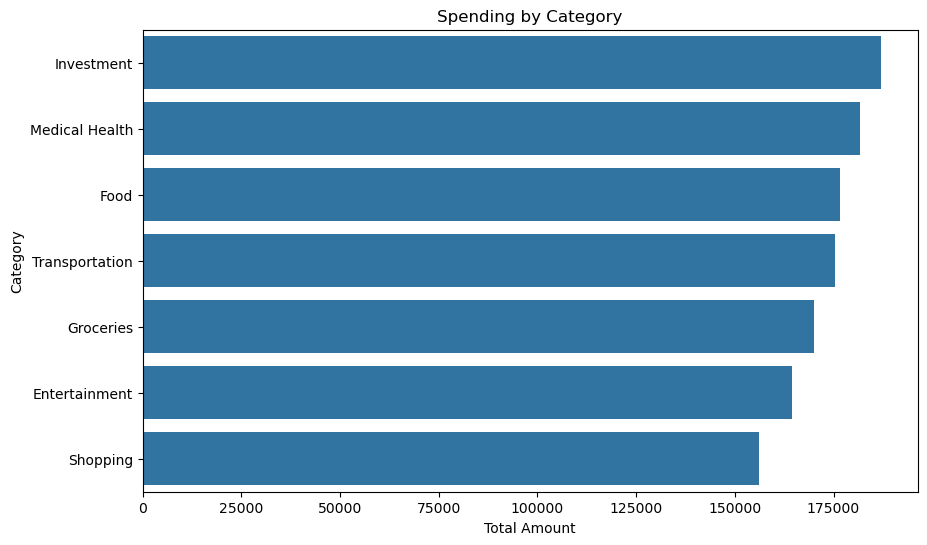

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spending by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Category', data=category_expenses.sort_values(by='Amount', ascending=False))
plt.title("Spending by Category")
plt.xlabel("Total Amount")
plt.ylabel("Category")
plt.show()

Observation:
1. A bar chart showing the total amount spent for each category.
2. Identifing which category is the highest and lowest spending.
3. Category "Investment" have the highest expenses & "Shopping" have the lowest expenses.

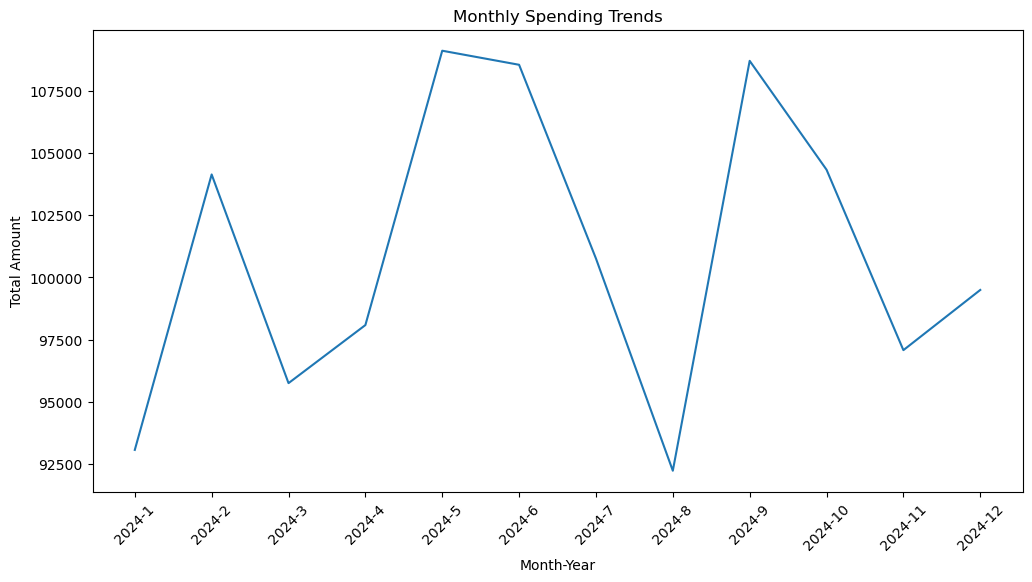

In [47]:
# Monthly spending trends
monthly_expenses['Month-Year'] = monthly_expenses['Year'].astype(str) + '-' + monthly_expenses['Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month-Year', y='Amount', data=monthly_expenses)
plt.title("Monthly Spending Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

Observation:
1. A line chart showing total expenses over time
2. Identifing which Month is the highest and lowest spending.
3. Month "May" have the highest spent & "August" have the lowest spent.

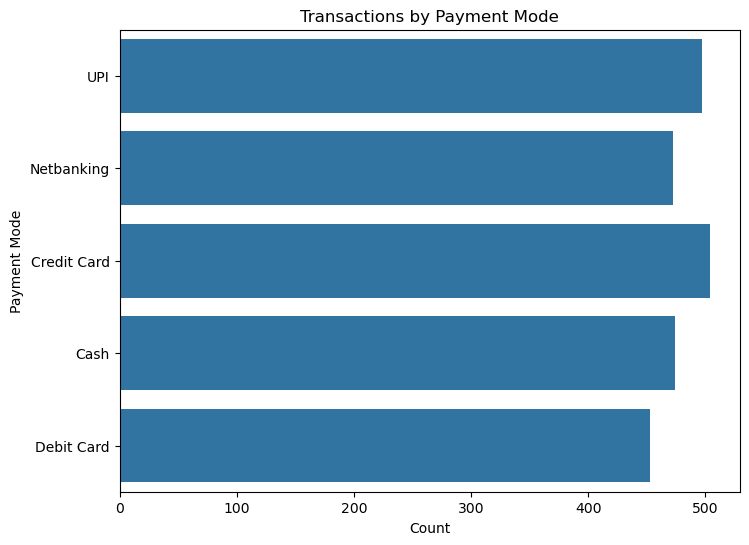

In [51]:
# Payment mode distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Payment_Mode', data=df)
plt.title("Transactions by Payment Mode")
plt.xlabel("Count")
plt.ylabel("Payment Mode")
plt.show()

Observation:
1. A bar chart showing the count of transactions for each payment method
2. Identifing which payment methods are most frequently used.

## Connecting Python to MYSQL

In [288]:
pip install pymysql


  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)


In [290]:
import pymysql
con= pymysql.connect(
    host="localhost",
    user="root",
    password="user_password",
    autocommit=True
    )
print(con)

## Create MYSQL Database

In [292]:
mycursor=con.cursor()
mycursor.execute("CREATE DATABASE EXPENSES_DB")
mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x)

('expense_db',)
('expenses_db',)
('information_schema',)
('mysql',)
('performance_schema',)
('sqlpython1',)
('sys',)


In [294]:
mycursor.execute("USE EXPENSES_DB")

0

## Create Table

In [296]:
mycursor.execute("CREATE TABLE Expense_tb (id INT AUTO_INCREMENT PRIMARY KEY, Date DATE, Category VARCHAR(255), Payment_Mode VARCHAR(255), Description TEXT, Amount DECIMAL(10, 2), Cashback DECIMAL(10, 2))")

0

## Read CSV File

In [298]:
import pandas as pd
df = pd.read_csv(r'C:\Users\DELL\Desktop\Project\Project1\Expenses_tracker.csv')

## Insert columns and rows

In [300]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="user_password",
    database="EXPENSES_DB"
    )
cursor = connection.cursor()

for index, row in df.iterrows():
    create_query = """
    INSERT INTO Expense_tb (Date, Category, Payment_Mode, Description, Amount, Cashback)
    VALUES (%s, %s, %s, %s, %s, %s)
    """
    values = (row['Date'], row['Category'], row['Payment_Mode'], row['Description'], row['Amount'], row['Cashback'])
    cursor.execute(create_query, values)
    connection.commit()